# Import

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Races

In [11]:
races = pd.read_csv('Datasets/races.csv', encoding = "ISO-8859-1")

# Constructors

In [12]:
constructors = pd.read_csv('Datasets/constructors.csv', encoding = "ISO-8859-1")

# Constructor Standings

In [13]:
constructorStandings = pd.read_csv('Datasets/constructorStandings.csv', encoding = "ISO-8859-1")

# Pre-processing Dataframes

In [14]:
# Combine Constructor, Constructor Standings, Races Dataframes.
combined1 = pd.merge(constructorStandings, races, how="left", on="raceId")
combined = pd.merge(combined1, constructors, how="left", on="constructorId")

In [15]:
# Extract the columns needed.
filtered = combined[[ "year", "points", "name_y"]]

In [16]:
# Exclude records before 2014.
filtered = filtered.loc[filtered["year"] >= 2014]

In [17]:
# Group the data into scuderia names and years.
grouped = filtered.groupby(["year", "name_y"]).max()

# Plot

C:\Users\K Weng\AppData\Local\Temp\ipykernel_22792\2836420164.py:22: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(teams, title = legend_title, bbox_to_anchor=(3, 1), loc=1,


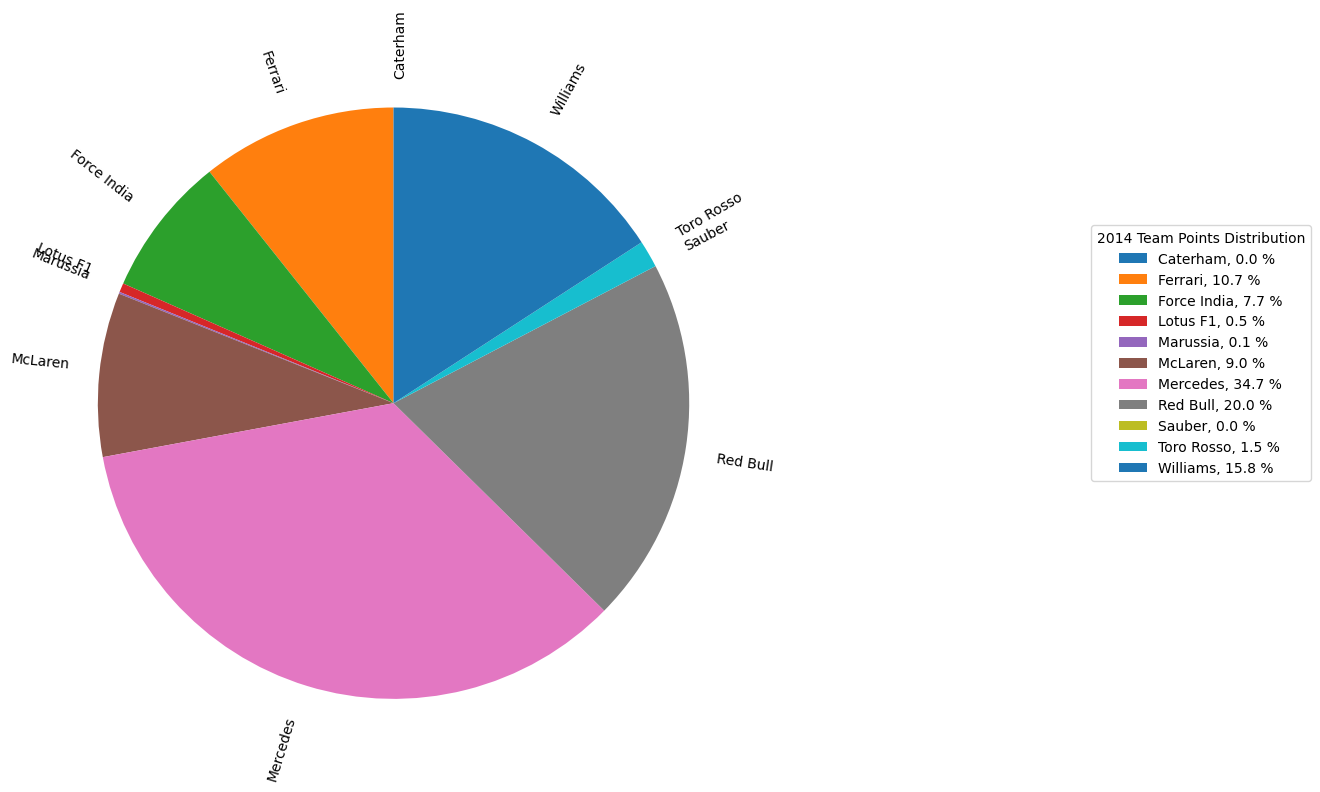

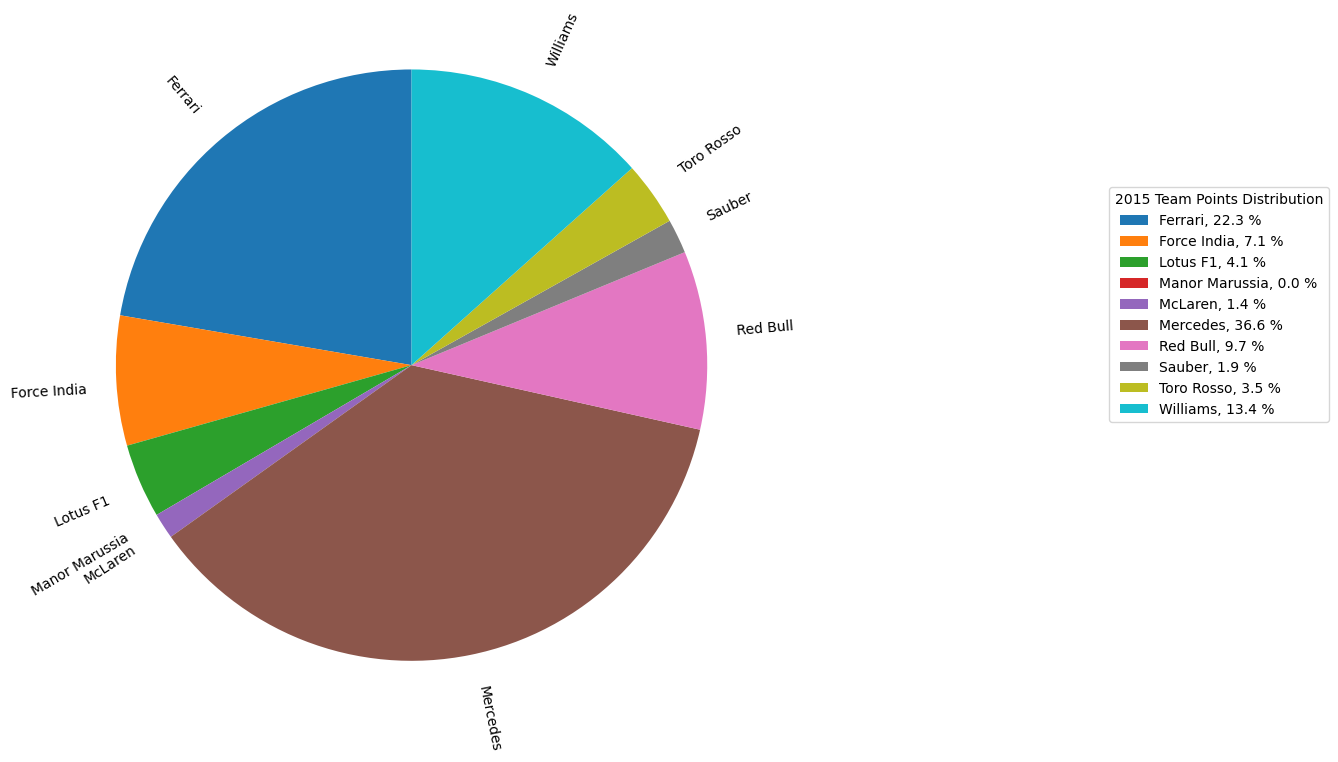

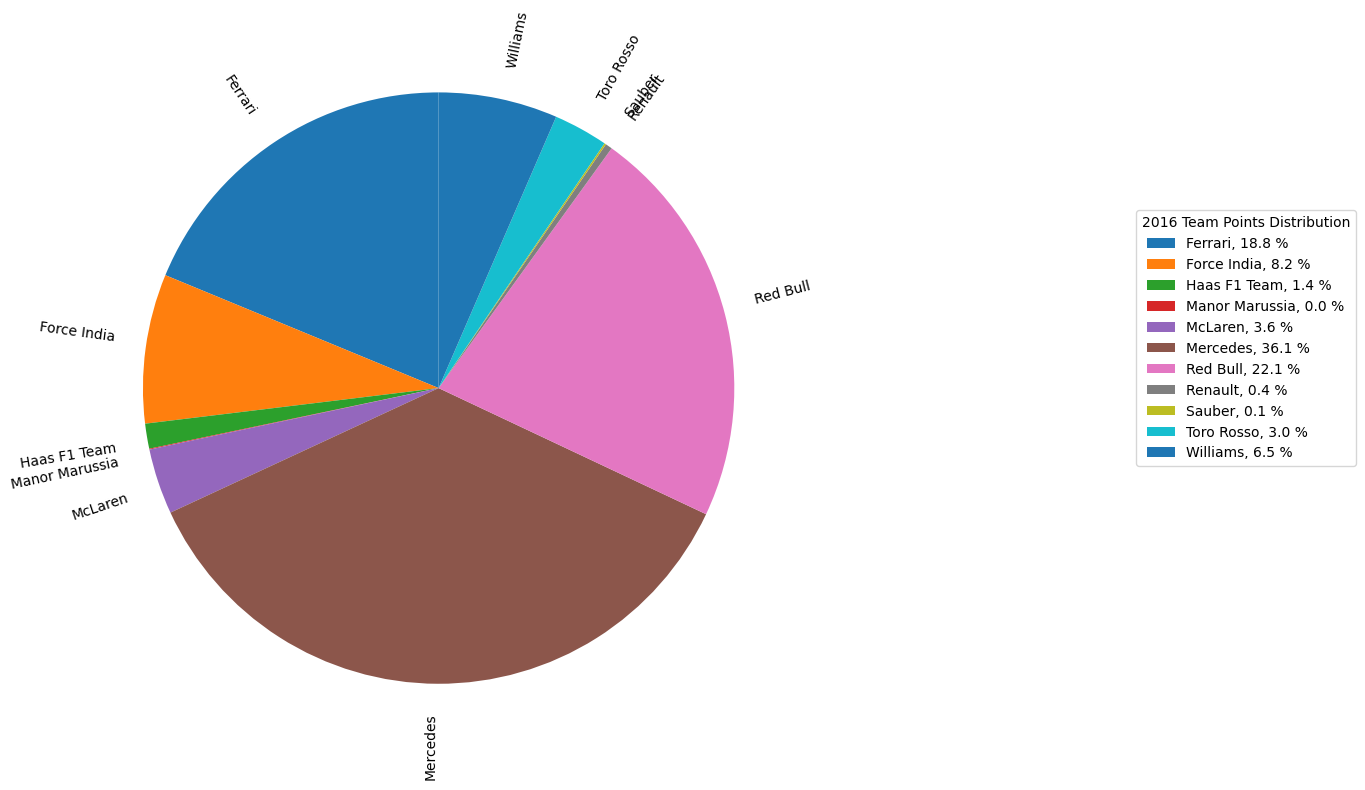

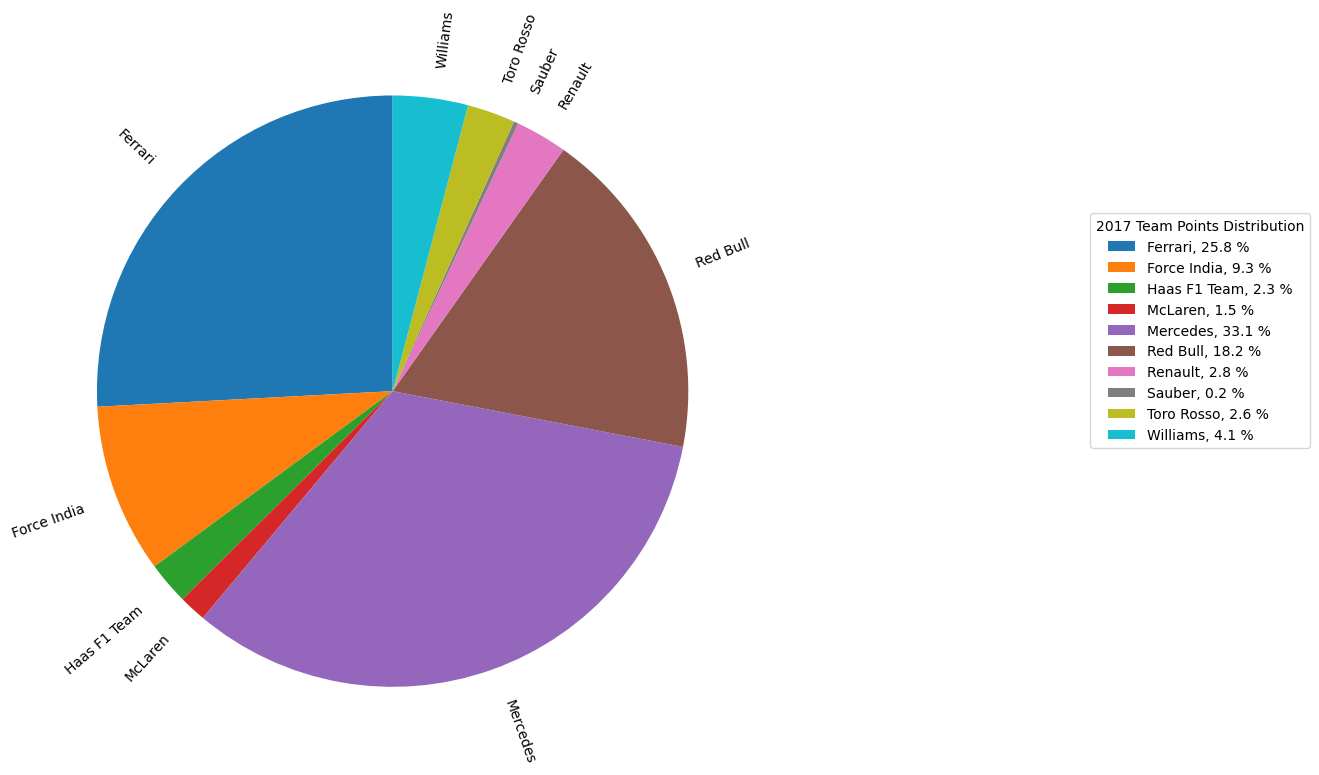

In [18]:
years = []
for (year, team) in grouped['points'].index:
    if year not in years:
        years.append(year)

# Plot annual graphs
for year in years:
    teams = []
    points = []

    for (year2, team) in grouped["points"].index:
        if (year2 == year):
            teams.append(team)
            points.append(grouped["points"][(year2, team)])

    plt.figure()

    legend_title = str(year) + " Team Points Distribution"

    plt.pie(points, labels=teams, startangle=90, rotatelabels=True, radius=2)
    # Display percentages in legend.
    plt.legend(teams, title = legend_title, bbox_to_anchor=(3, 1), loc=1, 
               labels=['%s, %1.1f %%' % (team, percentage) for team, percentage in zip(teams, points/sum(points)*100)])

plt.show()